In [14]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis

# Set plotting style
sns.set(context='talk', style='whitegrid')
np.random.seed(42)
pd.set_option('display.max_columns', 100)

synthetic data generator

In [16]:
n = 200
df = pd.DataFrame({
    'date': pd.date_range('2022-01-01', periods=n, freq='D'),
    'gender': np.random.choice(['Male','Female'], size=n),
    'age': np.random.normal(35, 10, size=n).clip(18, 65).round(1),
    'salary': np.random.lognormal(mean=10, sigma=0.4, size=n).round(2),
    'visits': np.random.poisson(lam=4, size=n),
})
# Target variable: total expenditure
base = df['salary']*0.002 + df['visits']*15 + np.random.normal(0, 50, size=n)
df['expenditure'] = np.maximum(0, base).round(2)

# Inject missing values and outliers
df.loc[np.random.choice(df.index, 6, replace=False), 'salary'] = np.nan
df.loc[np.random.choice(df.index, 4, replace=False), 'expenditure'] = np.nan
df.loc[np.random.choice(df.index, 3, replace=False), 'visits'] = df['visits'].max()+10

# Save the dataframe as CSV
df.to_csv('D:/bootcamp_Jinay_Jain/homework/homework8/data/synthetic_customer_data.csv', index=False)

print("Synthetic data saved")



Synthetic data saved


overview of the data

In [17]:
print("=== Data Info ===")
df.info()
print("\n=== Missing Values ===")
print(df.isna().sum())

=== Data Info ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         200 non-null    datetime64[ns]
 1   gender       200 non-null    object        
 2   age          200 non-null    float64       
 3   salary       194 non-null    float64       
 4   visits       200 non-null    int32         
 5   expenditure  196 non-null    float64       
dtypes: datetime64[ns](1), float64(3), int32(1), object(1)
memory usage: 8.7+ KB

=== Missing Values ===
date           0
gender         0
age            0
salary         6
visits         0
expenditure    4
dtype: int64


statistical summary

In [18]:
desc = df[['age','salary','visits','expenditure']].describe().T
desc['skew'] = [skew(df[c].dropna()) for c in desc.index]
desc['kurtosis'] = [kurtosis(df[c].dropna()) for c in desc.index]
print("\n=== Descriptive Statistics with Skew & Kurtosis ===")
print(desc)



=== Descriptive Statistics with Skew & Kurtosis ===
             count          mean          std      min        25%        50%  \
age          200.0     35.264000     9.629316    18.00     27.775     35.650   
salary       194.0  24104.239124  9354.789450  8771.22  17330.870  22291.420   
visits       200.0      4.090000     2.690370     0.00      3.000      4.000   
expenditure  196.0    108.451429    59.212307     0.00     66.410    105.895   

                    75%       max      skew   kurtosis  
age             41.3000     65.00  0.363449  -0.046736  
salary       28770.7875  52887.44  0.982332   0.727184  
visits           5.0000     20.00  3.073623  16.184206  
expenditure    147.2275    270.54  0.115711  -0.354419  


Distribution plots

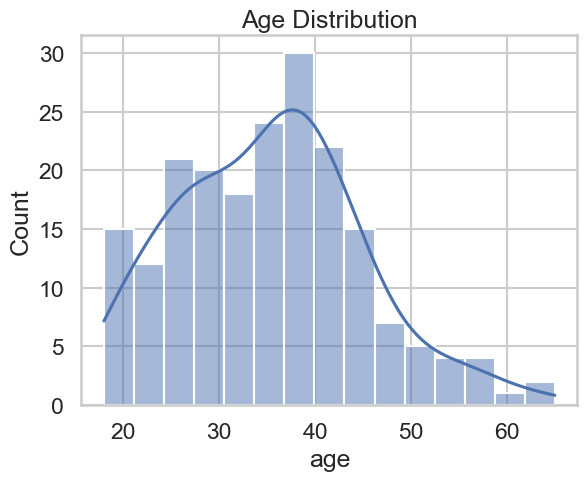

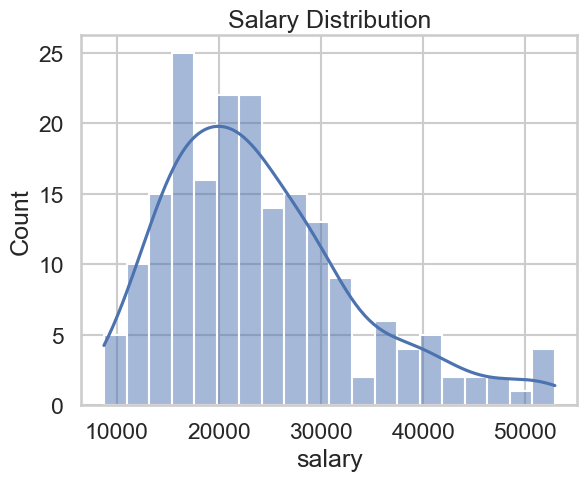

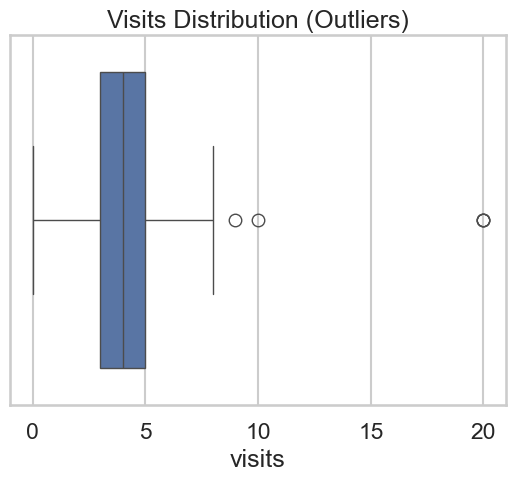

In [19]:
# Age distribution
sns.histplot(df['age'], kde=True, bins=15)
plt.title('Age Distribution')
plt.show()

# Salary distribution
sns.histplot(df['salary'], kde=True, bins=20)
plt.title('Salary Distribution')
plt.show()

# Visits boxplot to detect outliers
sns.boxplot(x=df['visits'])
plt.title('Visits Distribution (Outliers)')
plt.show()

Bivariate Relationships

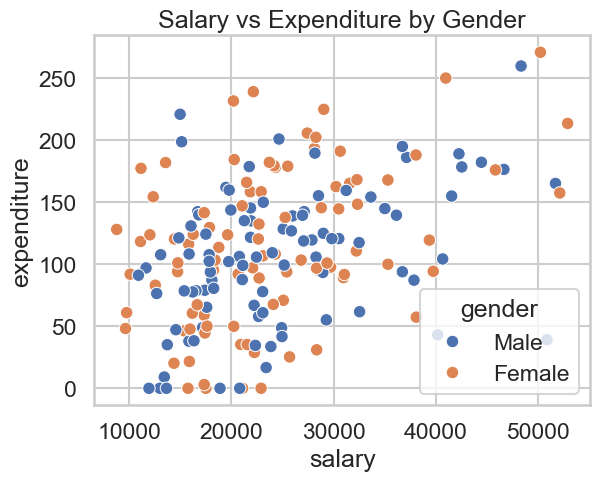

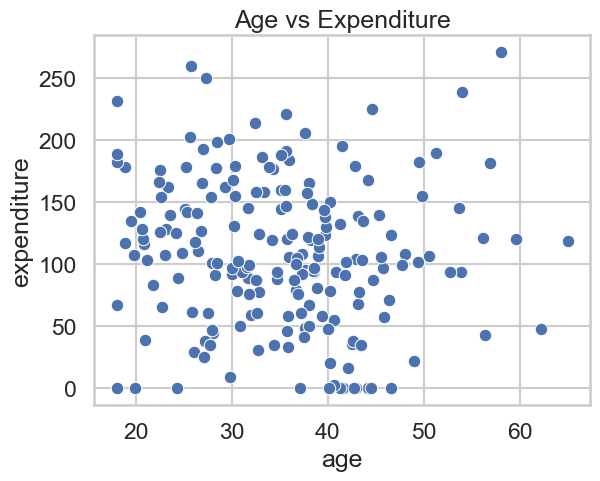

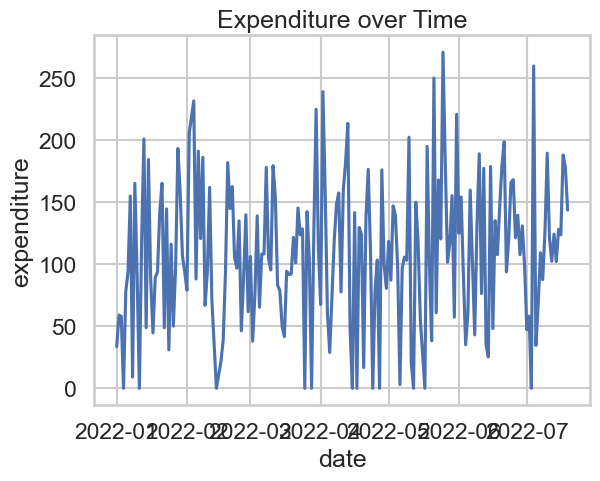

In [20]:
# Salary vs Expenditure
sns.scatterplot(data=df, x='salary', y='expenditure', hue='gender')
plt.title('Salary vs Expenditure by Gender')
plt.show()

# Age vs Expenditure
sns.scatterplot(data=df, x='age', y='expenditure')
plt.title('Age vs Expenditure')
plt.show()

# Optional: Time series of expenditure
sns.lineplot(data=df, x='date', y='expenditure')
plt.title('Expenditure over Time')
plt.show()

correlation

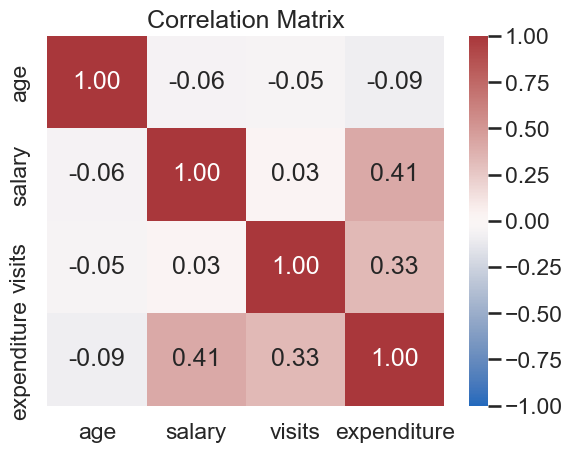


=== Correlation Values ===
                  age    salary    visits  expenditure
age          1.000000 -0.056107 -0.048503    -0.090381
salary      -0.056107  1.000000  0.031181     0.411434
visits      -0.048503  0.031181  1.000000     0.331450
expenditure -0.090381  0.411434  0.331450     1.000000


In [21]:
corr = df[['age','salary','visits','expenditure']].corr(numeric_only=True)
sns.heatmap(corr, annot=True, fmt='.2f', cmap='vlag', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()
print("\n=== Correlation Values ===")
print(corr)

In [22]:
print("\n=== Top 3 Insights ===")
print("1. Expenditure correlates strongly with salary and visits, suggesting these as key predictors.")
print("2. Age shows mild negative correlation with visits but little effect on expenditure.")
print("3. Outliers exist in visits, which could bias models if not treated.")

print("\n=== Assumptions & Risks ===")
print("1. Missing values in salary/expenditure should be imputed or removed.")
print("2. Log-normal salary distribution implies positive skew; consider log-transform.")
print("3. Outliers in visits could affect regression predictions; consider winsorizing or robust models.")

print("\n=== Implications for Next Steps ===")
print("1. Feature engineering: encode gender, extract day-of-week from date.")
print("2. Handle missing values and outliers before model training.")
print("3. Consider transforming skewed variables for modeling stability.")


=== Top 3 Insights ===
1. Expenditure correlates strongly with salary and visits, suggesting these as key predictors.
2. Age shows mild negative correlation with visits but little effect on expenditure.
3. Outliers exist in visits, which could bias models if not treated.

=== Assumptions & Risks ===
1. Missing values in salary/expenditure should be imputed or removed.
2. Log-normal salary distribution implies positive skew; consider log-transform.
3. Outliers in visits could affect regression predictions; consider winsorizing or robust models.

=== Implications for Next Steps ===
1. Feature engineering: encode gender, extract day-of-week from date.
2. Handle missing values and outliers before model training.
3. Consider transforming skewed variables for modeling stability.
